# Pytorch Fundamentals

In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

2.1.2


# Introduction to Tensors

## Creating Tensors

In [2]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [3]:
scalar.ndim

0

In [4]:
scalar.item(), scalar.shape

(7, torch.Size([]))

In [5]:
scalar.detach().numpy()

array(7)

In [6]:
# vector
vector = torch.tensor([7, 7])
vector

tensor([7, 7])

In [7]:
vector.ndim

1

In [8]:
vector.shape

torch.Size([2])

In [9]:
# MATRIX

MATRIX = torch.tensor([[1,2], [3,4]])
MATRIX

tensor([[1, 2],
        [3, 4]])

In [10]:
MATRIX.ndim

2

In [11]:
MATRIX.shape

torch.Size([2, 2])

In [12]:
torch.rand((3, 4))

tensor([[0.2778, 0.6661, 0.5754, 0.7569],
        [0.6393, 0.2925, 0.4666, 0.9938],
        [0.9050, 0.0413, 0.8376, 0.9265]])

In [13]:
torch.ones((1,2))

tensor([[1., 1.]])

In [14]:
torch.zeros((4,5))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [15]:
a = torch.arange(0, 10, 1)

In [18]:
a

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
a + 10

tensor([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [20]:
a - 10

tensor([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1])

In [21]:
a * 100

tensor([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [27]:
b = torch.arange(0, 10, 1)

In [45]:
a = torch.tensor([[1,2,3], [4,5,6]])
a.shape, a

(torch.Size([2, 3]),
 tensor([[1, 2, 3],
         [4, 5, 6]]))

In [53]:
b = torch.tensor([[1,2], [3,4], [5,6]])
b.shape, b

(torch.Size([3, 2]),
 tensor([[1, 2],
         [3, 4],
         [5, 6]]))

In [54]:
torch.matmul(a, b)

tensor([[22, 28],
        [49, 64]])

In [72]:
torch.manual_seed(0)
m = torch.nn.Linear(10, 2)
a = torch.arange(10, dtype=torch.float)
m(a)

tensor([ 1.2487, -2.3710], grad_fn=<ViewBackward0>)

In [74]:
a.mean(), a.max(), a.sum, a.type(torch.int).max()

(tensor(4.5000),
 tensor(9.),
 <function Tensor.sum>,
 tensor(9, dtype=torch.int32))

In [89]:
z = a.reshape(2,5)
z, a

(tensor([[0., 1., 2., 3., 4.],
         [5., 6., 7., 8., 9.]]),
 tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [92]:
z[0,0] = 10
a, z

(tensor([10.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 tensor([[10.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.]]))

In [93]:
a

tensor([10.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [102]:
torch.stack([a, a, a], dim=1).shape

torch.Size([10, 3])

In [103]:
a.shape

torch.Size([10])

In [106]:
a = a.reshape(1,1,1,10)

In [122]:
a = a.squeeze()
a.shape

torch.Size([10])

In [125]:
a = a.unsqueeze(0)
a.shape

torch.Size([1, 10])

In [132]:
a = a.reshape(5,2,1)
a.shape

torch.Size([5, 2, 1])

In [133]:
a = a.permute(2, 0, 1)
a.shape

torch.Size([1, 5, 2])

# Quick Start

## Data loading

In [135]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



Shape of X[N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]), torch.int64


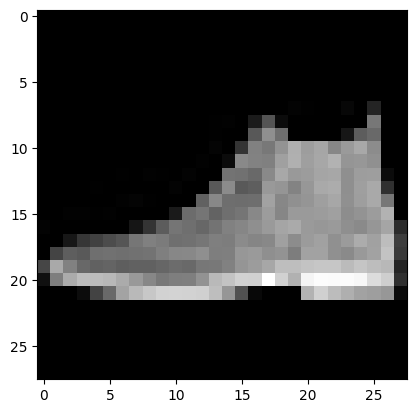

In [138]:
import matplotlib.pyplot as plt

batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X[N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape}, {y.dtype}")
    plt.imshow(X[0, 0], cmap="gray")
    break

In [175]:
import os
from torch.utils.data import Dataset
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

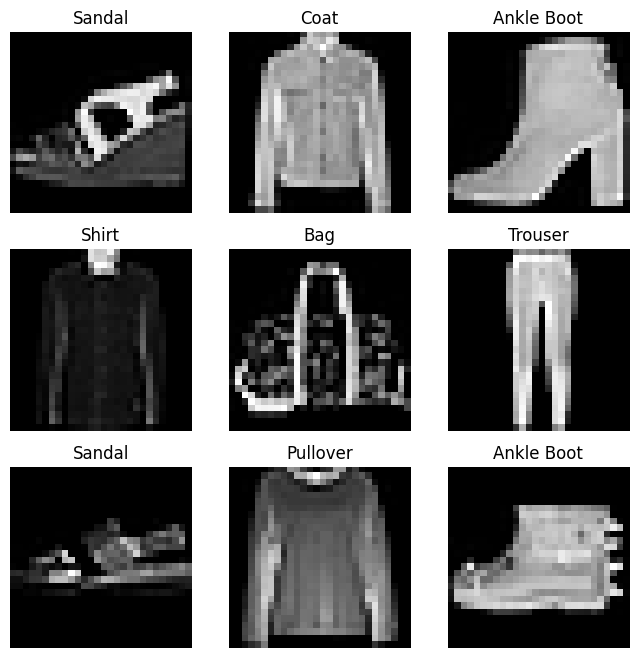

In [176]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Model Creation

In [139]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using mps device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [150]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

tensor([[ 0.0946, -0.0741,  0.0059, -0.0514, -0.0726, -0.0335, -0.0029,  0.0295,
         -0.1075, -0.0044]], device='mps:0', grad_fn=<LinearBackward0>)
Predicted class: tensor([0], device='mps:0')


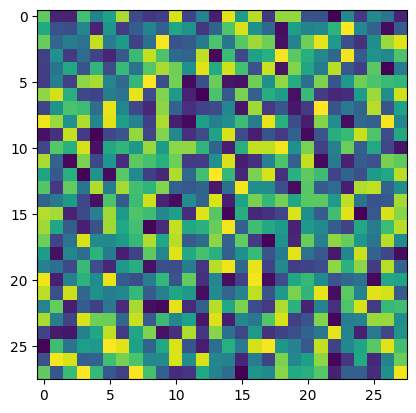

In [149]:
plt.imshow(X[0].cpu())

In [154]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [155]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [156]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [157]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.2932,  0.1074,  0.2164,  0.3060,  0.2903, -0.8541, -0.3024,  0.0654,
          0.1581, -0.2964, -0.0432, -0.6095, -0.0831,  0.3058, -0.0021, -0.3437,
         -0.0242, -0.4084, -0.1875, -0.2886],
        [ 0.0777, -0.1754,  0.1518,  0.2886,  0.3575, -0.4111, -0.1997,  0.2162,
          0.5234, -0.3023, -0.0613, -0.7122,  0.0019,  0.4693, -0.1222, -0.5706,
         -0.0669, -0.2855, -0.2851,  0.0156],
        [-0.1946, -0.0647, -0.0046,  0.3398,  0.4019, -0.5406, -0.3338, -0.0447,
          0.2333, -0.2985,  0.1862, -0.5528, -0.3240, -0.0917, -0.3531, -0.4439,
          0.1737, -0.4440, -0.1005, -0.3075]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.1074, 0.2164, 0.3060, 0.2903, 0.0000, 0.0000, 0.0654, 0.1581,
         0.0000, 0.0000, 0.0000, 0.0000, 0.3058, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.0777, 0.0000, 0.1518, 0.2886, 0.3575, 0.0000, 0.0000, 0.2162, 0.5234,
         0.0000, 0.0000, 0.0000, 0.0019, 0.4693, 0.00

In [159]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)
print(logits)

tensor([[ 0.0422,  0.1289,  0.2503,  0.1106, -0.0144,  0.1145,  0.2289,  0.0931,
          0.1484, -0.0196],
        [ 0.0267,  0.1233,  0.2151,  0.1321, -0.0986,  0.1405,  0.2137,  0.1454,
          0.2558, -0.0158],
        [ 0.0587,  0.1248,  0.2317,  0.1303, -0.0385,  0.0902,  0.2251,  0.1144,
          0.2602, -0.1263]], grad_fn=<AddmmBackward0>)


In [161]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)
pred_probab

tensor([[0.0933, 0.1017, 0.1148, 0.0999, 0.0881, 0.1003, 0.1124, 0.0981, 0.1037,
         0.0877],
        [0.0912, 0.1004, 0.1101, 0.1013, 0.0804, 0.1021, 0.1099, 0.1026, 0.1146,
         0.0874],
        [0.0947, 0.1011, 0.1125, 0.1017, 0.0859, 0.0977, 0.1118, 0.1001, 0.1158,
         0.0787]], grad_fn=<SoftmaxBackward0>)

# Training and evaluation

In [162]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [164]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [165]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [166]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.292485  [   64/60000]
loss: 2.282282  [ 6464/60000]
loss: 2.270876  [12864/60000]
loss: 2.276430  [19264/60000]
loss: 2.250140  [25664/60000]
loss: 2.226430  [32064/60000]
loss: 2.218758  [38464/60000]
loss: 2.183156  [44864/60000]
loss: 2.186739  [51264/60000]
loss: 2.163239  [57664/60000]
Test Error: 
 Accuracy: 48.4%, Avg loss: 2.150006 

Epoch 2
-------------------------------
loss: 2.155644  [   64/60000]
loss: 2.147437  [ 6464/60000]
loss: 2.089247  [12864/60000]
loss: 2.113857  [19264/60000]
loss: 2.066577  [25664/60000]
loss: 2.004973  [32064/60000]
loss: 2.021041  [38464/60000]
loss: 1.939558  [44864/60000]
loss: 1.954232  [51264/60000]
loss: 1.892443  [57664/60000]
Test Error: 
 Accuracy: 59.0%, Avg loss: 1.878979 

Epoch 3
-------------------------------
loss: 1.911788  [   64/60000]
loss: 1.883075  [ 6464/60000]
loss: 1.761776  [12864/60000]
loss: 1.807954  [19264/60000]
loss: 1.711188  [25664/60000]
loss: 1.664476  [32064/600

In [167]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


In [168]:
model = NeuralNetwork().to(device)
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

Predicted: "Ankle boot", Actual: "Ankle boot"


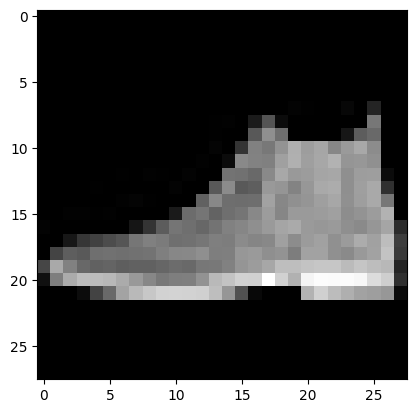

In [177]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    x = x.to(device)
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
    plt.imshow(x[0].cpu(), cmap="gray")
    plt.show()